# Kaggle Playground Season 4 Episode 7

In [27]:
# Required only once to download the datasets
!pip install kaggle
!kaggle competitions download -c playground-series-s4e7

Defaulting to user installation because normal site-packages is not writeable
 78%|███████████████████████████████▏        | 193M/247M [00:28<00:10, 5.58MB/s]^C
 78%|███████████████████████████████▏        | 193M/247M [00:28<00:07, 7.19MB/s]
User cancelled operation


What is an Insurance Annual Premium: https://www.investopedia.com/terms/i/insurance-premium.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/train.csv', nrows=1000000)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1000000 non-null  int64  
 1   Gender                1000000 non-null  object 
 2   Age                   1000000 non-null  int64  
 3   Driving_License       1000000 non-null  int64  
 4   Region_Code           1000000 non-null  float64
 5   Previously_Insured    1000000 non-null  int64  
 6   Vehicle_Age           1000000 non-null  object 
 7   Vehicle_Damage        1000000 non-null  object 
 8   Annual_Premium        1000000 non-null  float64
 9   Policy_Sales_Channel  1000000 non-null  float64
 10  Vintage               1000000 non-null  int64  
 11  Response              1000000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 91.6+ MB


## Exploratory Data Analysis

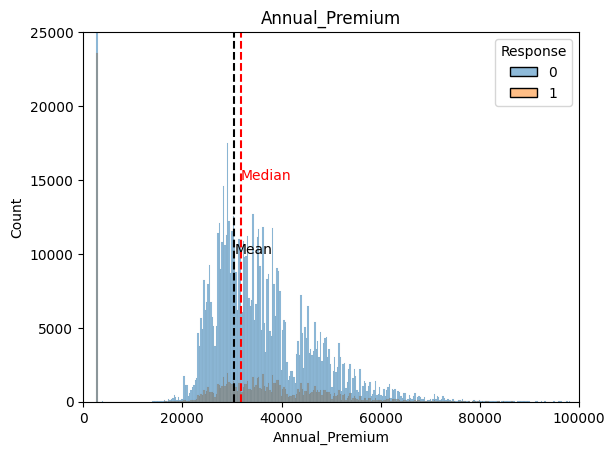

In [4]:
def plot_hist(df, col, xlim=100000, ylim=25000):
    ax = sns.histplot(data=df, x=col, hue='Response')
    ax.set_xlim(0, xlim)
    ax.set_ylim(0, ylim)
    ax.set_title(col)
    col_mean = np.mean(df[col])
    col_median = np.median(df[col])
    plt.axvline(col_mean, 0, 10000, linestyle='--', color='k')
    plt.axvline(col_median, 0, 10000, linestyle='--', color='r')
    ax.text(np.round(col_mean), 10000, 'Mean')
    ax.text(np.round(col_median), 15000, 'Median', color='r')

plot_hist(df, 'Annual_Premium')

In [5]:
df['Annual_Premium'].describe()

count    1000000.000000
mean       30460.636005
std        16426.250892
min         2630.000000
25%        25275.000000
50%        31824.000000
75%        39461.000000
max       540165.000000
Name: Annual_Premium, dtype: float64

Distribution is skewed to the left: mean < median

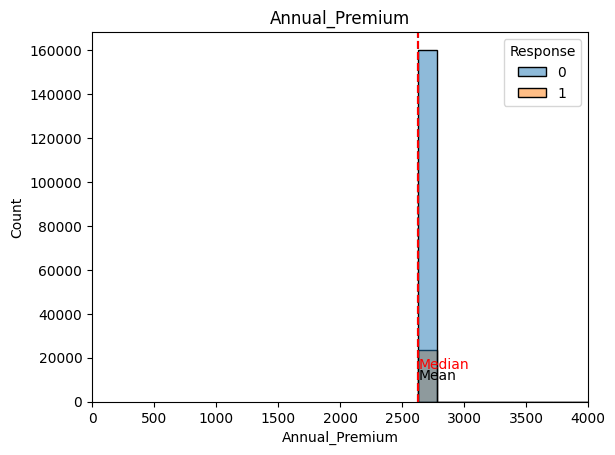

In [6]:
plot_hist(df[df['Annual_Premium'] < 10000], 'Annual_Premium', xlim=4000, ylim=None)

<Axes: xlabel='Driving_License', ylabel='count'>

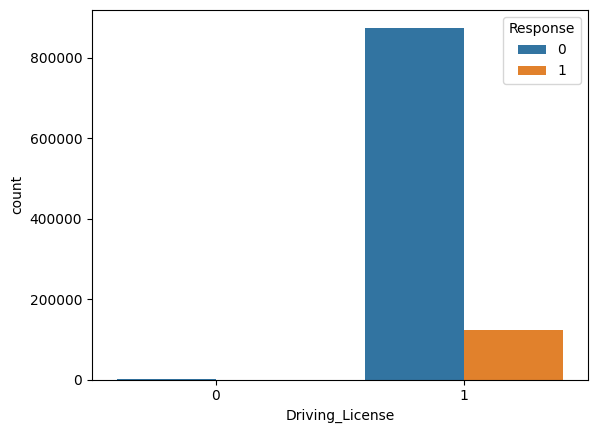

In [7]:
sns.countplot(data=df, x='Driving_License', hue='Response')

<Axes: xlabel='Previously_Insured', ylabel='count'>

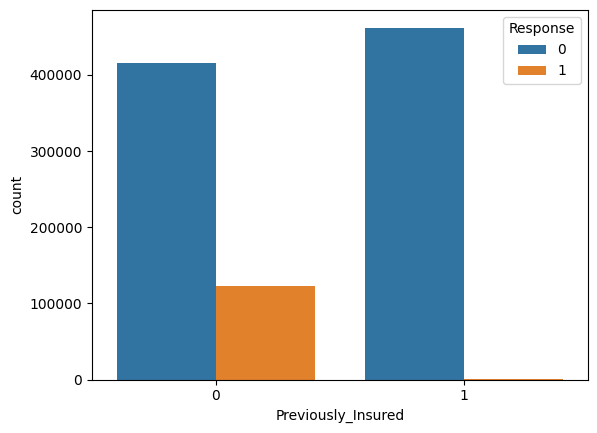

In [8]:
sns.countplot(data=df, x='Previously_Insured', hue='Response')

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

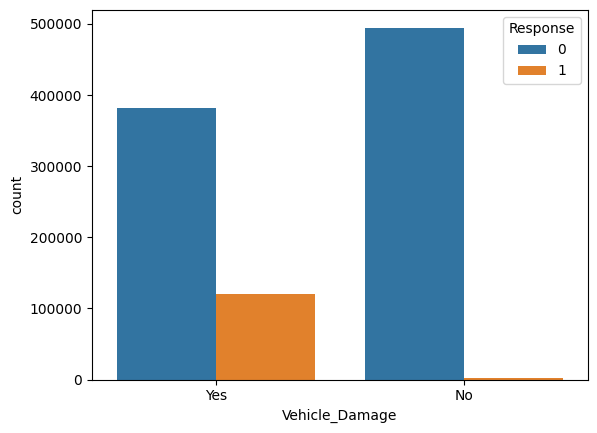

In [9]:
sns.countplot(data=df, x='Vehicle_Damage', hue='Response')

<Axes: xlabel='Vehicle_Age', ylabel='count'>

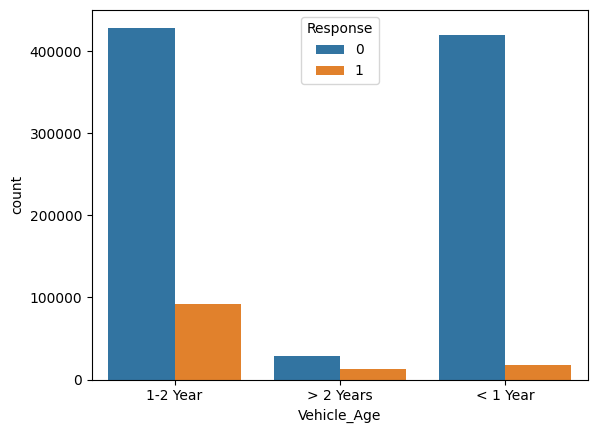

In [10]:
sns.countplot(data=df, x='Vehicle_Age', hue='Response')

<Axes: xlabel='Gender', ylabel='count'>

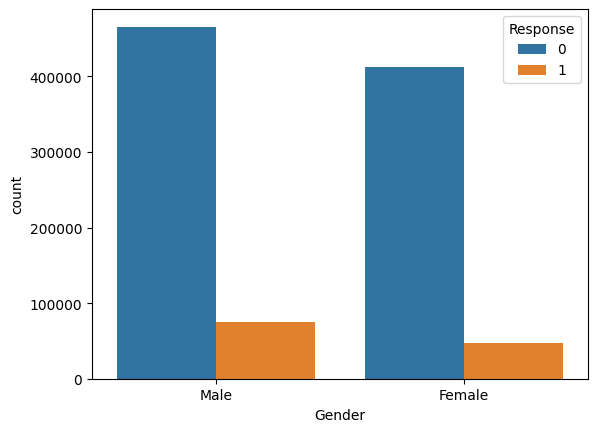

In [11]:
sns.countplot(data=df, x='Gender', hue='Response')

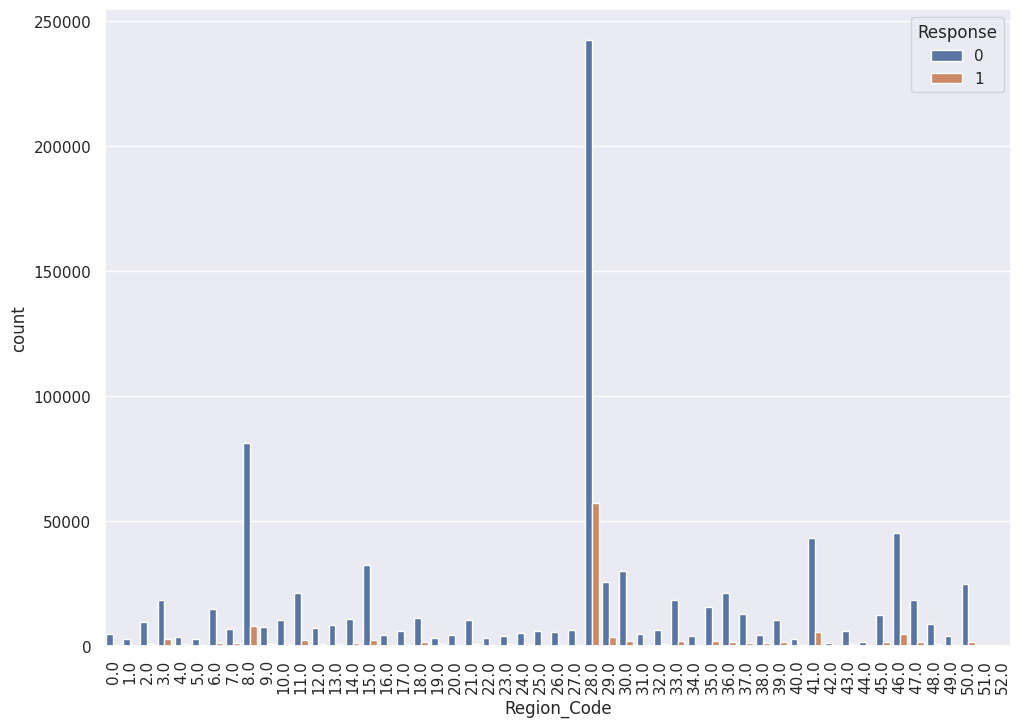

In [12]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(data=df, x='Region_Code', hue='Response')
ax.tick_params(axis='x', rotation=90)

<Axes: xlabel='Vintage', ylabel='Count'>

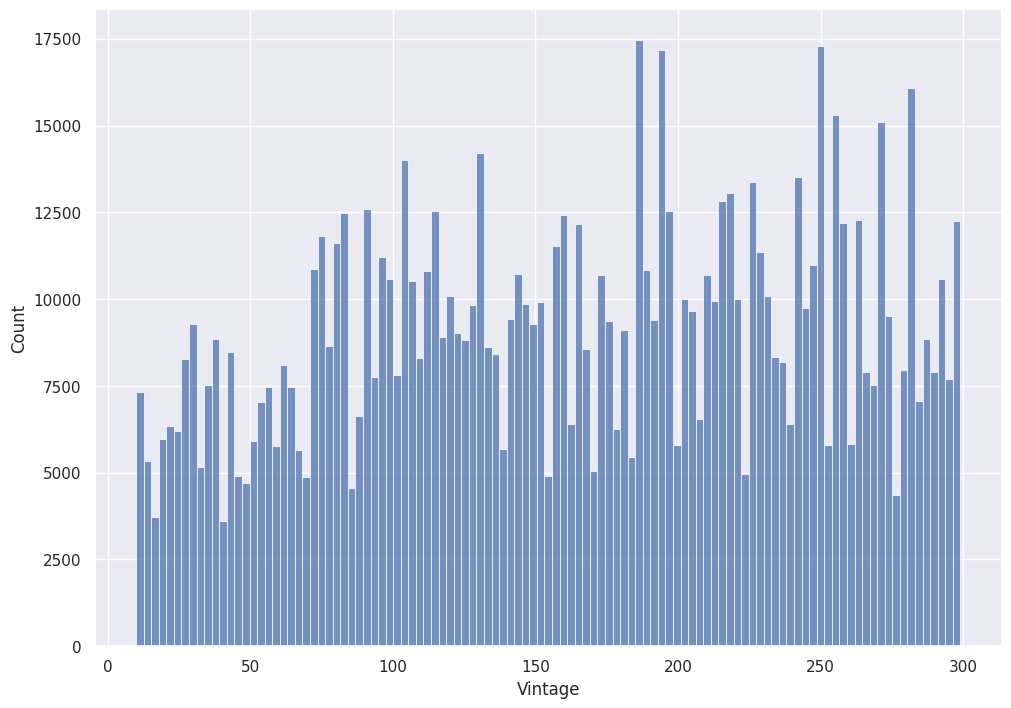

In [13]:
sns.histplot(data=df, x='Vintage')

<Axes: xlabel='Age', ylabel='Count'>

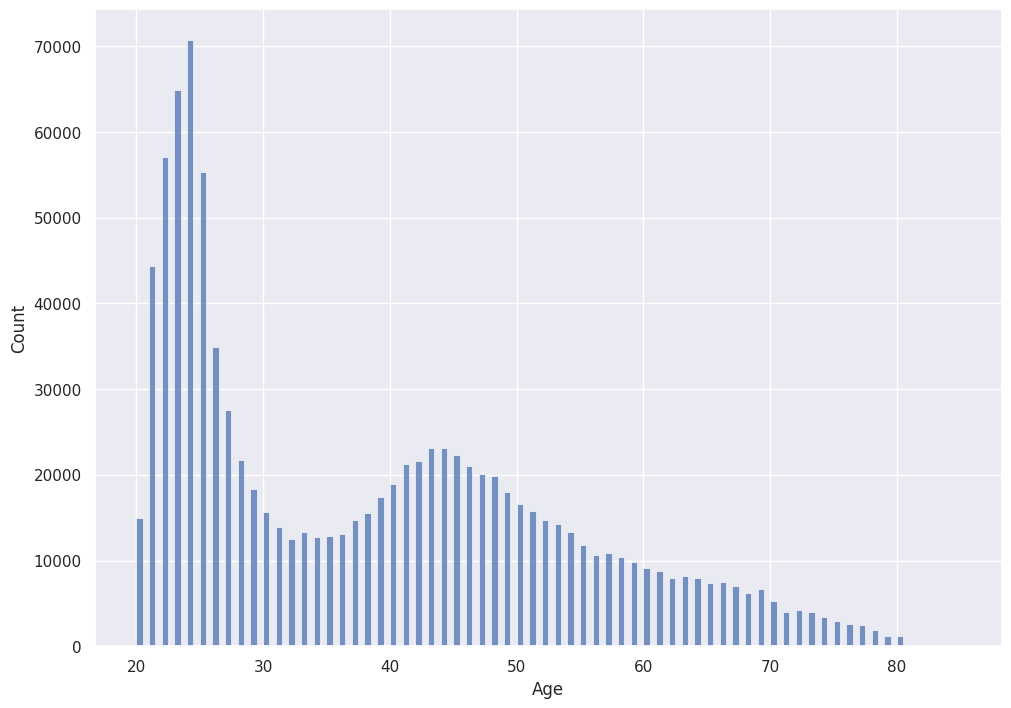

In [14]:
sns.histplot(data=df, x='Age')

([<matplotlib.patches.Wedge at 0x7f3ff4de9c60>,
 [Text(-1.0194137898118212, 0.41327415252045513, 'no'),
  Text(1.0194138259413925, -0.413274063400466, 'yes')],
 [Text(-0.5560438853519024, 0.2254222650111573, '87.74%'),
  Text(0.5560439050589413, -0.22542221640025417, '12.26%')])

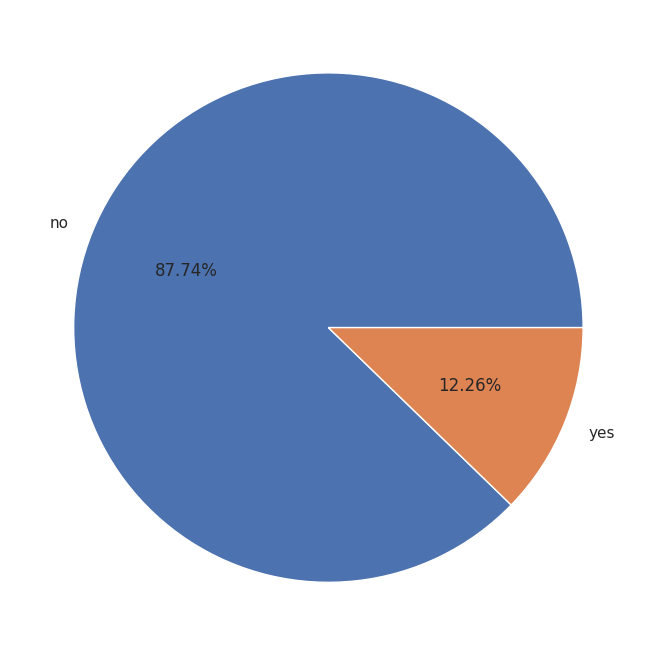

In [15]:
y = df['Response'].value_counts()
plt.pie(y, autopct='%.2f%%', labels=['no', 'yes'])

## Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le.fit(df['Region_Code'])
df['Region_Code_Transform'] = le.transform(df['Region_Code'])
df[['Region_Code', 'Region_Code_Transform']].head()


,Region_Code,Region_Code_Transform
0,35.0,35
1,28.0,28
2,14.0,14
3,1.0,1
4,15.0,15


In [18]:
le = LabelEncoder()
df['Policy_Sales_Channel_Transform'] = le.fit_transform(df['Policy_Sales_Channel'])
df[['Policy_Sales_Channel', 'Policy_Sales_Channel_Transform']].head()

,Policy_Sales_Channel,Policy_Sales_Channel_Transform
0,124.0,109
1,26.0,24
2,152.0,132
3,156.0,136
4,152.0,132


In [19]:
df = df.astype({'Driving_License': 'object',
           'Vehicle_Damage': 'object',
           'Vintage': 'object',
           'Region_Code_Transform': 'object',
           'Policy_Sales_Channel_Transform': 'object',
           'Previously_Insured': 'object',
           'Response': 'object'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   id                              1000000 non-null  int64  
 1   Gender                          1000000 non-null  object 
 2   Age                             1000000 non-null  int64  
 3   Driving_License                 1000000 non-null  object 
 4   Region_Code                     1000000 non-null  float64
 5   Previously_Insured              1000000 non-null  object 
 6   Vehicle_Age                     1000000 non-null  object 
 7   Vehicle_Damage                  1000000 non-null  object 
 8   Annual_Premium                  1000000 non-null  float64
 9   Policy_Sales_Channel            1000000 non-null  float64
 10  Vintage                         1000000 non-null  object 
 11  Response                        1000000 non-null  object 
 12  R

## Imbalanced Dataset

In [ ]:
# import imblearn